<a href="https://colab.research.google.com/github/WellingtonLandim/wellingtonlandim.github.io/blob/main/Deteccao_Classificacao/YoloV3_simples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import matplotlib.pyplot as plt
from google.colab import files
import cv2
import matplotlib.pyplot as plt
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
# verify CUDA
!/usr/local/cuda/bin/nvcc --version
# make darknet (build)
!make
# # Baixando os pesos da rede Yolo v3
# A rede foi treinada com 80 classes existente no dataset Coco. Será utilizada esses pesos, previamene treinados para rodar o Yolov3.
# get yolov3 pretrained coco dataset weights
!wget https://pjreddie.com/media/files/yolov3.weights
# define helper functions







Cloning into 'darknet'...
remote: Enumerating objects: 15873, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 15873 (delta 12), reused 7 (delta 7), pack-reused 15850 (from 3)
Receiving objects: 100% (15873/15873), 14.50 MiB | 15.60 MiB/s, done.
Resolving deltas: 100% (10679/10679), done.
/content/darknet
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0
mkdir -p ./obj/
mkdir -p backup
mkdir -p results
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -rdynamic -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image

In [21]:
def yolo_image(image_path):
  !./darknet detect cfg/yolov3.cfg yolov3.weights {image_path} -dont_show

  image = cv2.imread('predictions.jpg')
  if image is None:
    print(f"Error: Could not read image at path: {path}")
    return

  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

 CUDA-version: 12020 (12020), cuDNN: 8.9.6, GPU count: 1  
 OpenCV version: 4.5.4
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  

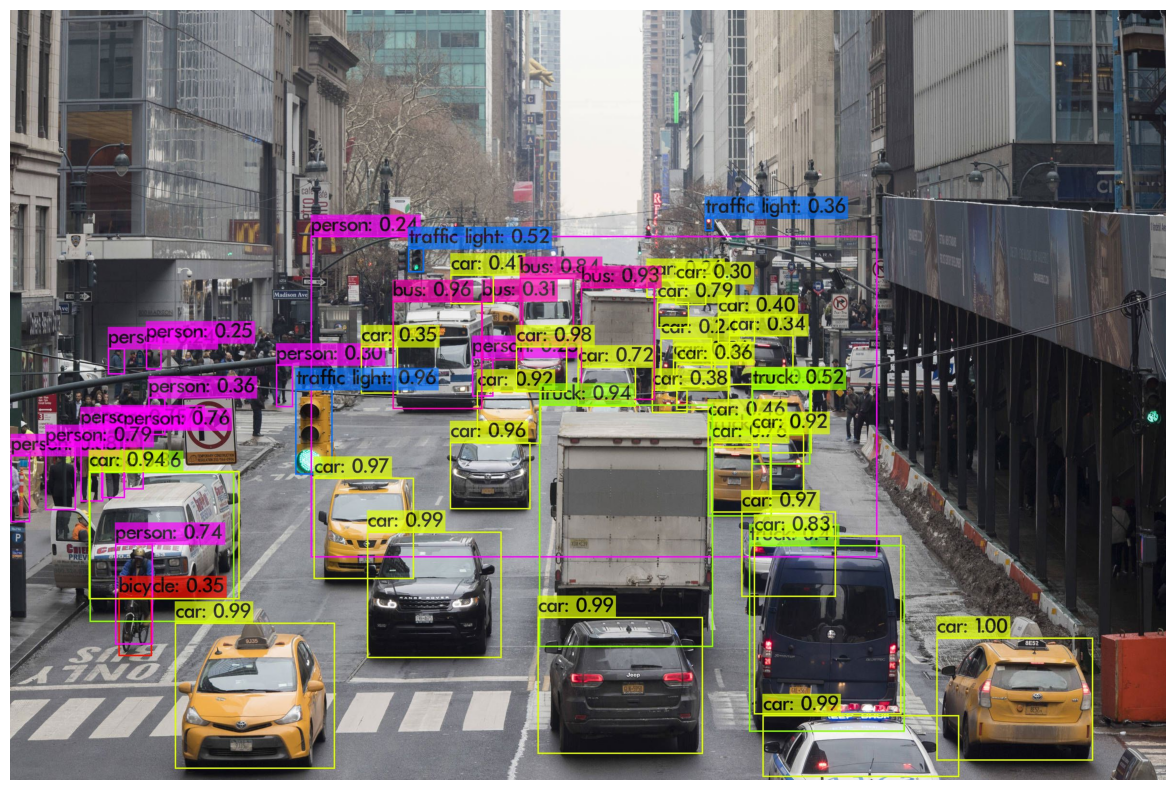

In [22]:
#"imagem = !wget https://www.google.com/imgres?q=nova%20york%20transito&imgurl=https%3A%2F%2Ff.i.uol.com.br%2Ffotografia%2F2018%2F02%2F15%2F15187438785a863146413cb_1518743878_3x2_rt.jpg&imgrefurl=https%3A%2F%2Fwww1.folha.uol.com.br%2Fcotidiano%2F2018%2F02%2Fpara-salvar-metro-em-crise-nova-york-estuda-adotar-pedagio-urbano.shtml&docid=3lt3-cYOEdh_dM&tbnid=Qvo4btWd0qd8rM&vet=12ahUKEwilyeOS-YeLAxUhD7kGHfHDC0EQM3oECHgQAA..i&w=2400&h=1599&hcb=2&ved=2ahUKEwilyeOS-YeLAxUhD7kGHfHDC0EQM3oECHgQAA

imagem = '/content/15187438785a863146413cb_1518743878_3x2_rt.jpg'
yolo_image(imagem)

In [23]:
# prompt: crie um def para analisar video com yolo

def process_video(video_path, output_path):
    !./darknet detector demo cfg/coco.data cfg/yolov3.cfg yolov3.weights {video_path} -out_filename {output_path} -dont_show
    print(f"Video processed. Output saved to: {output_path}")

 CUDA-version: 12020 (12020), cuDNN: 8.9.6, GPU count: 1  
 OpenCV version: 4.5.4
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  

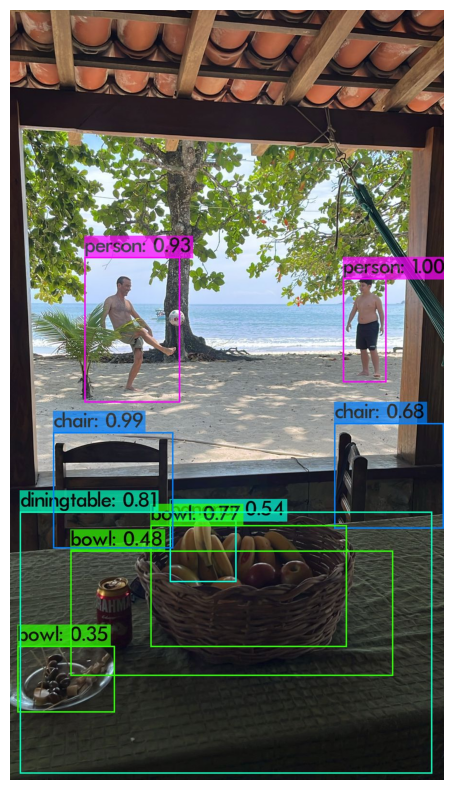

In [28]:
yolo_image('/content/imagem_2025-01-21_210741736.png')

Saving 05012013-DSC_0291.jpg to 05012013-DSC_0291.jpg
 CUDA-version: 12020 (12020), cuDNN: 8.9.6, GPU count: 1  
 OpenCV version: 4.5.4
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 

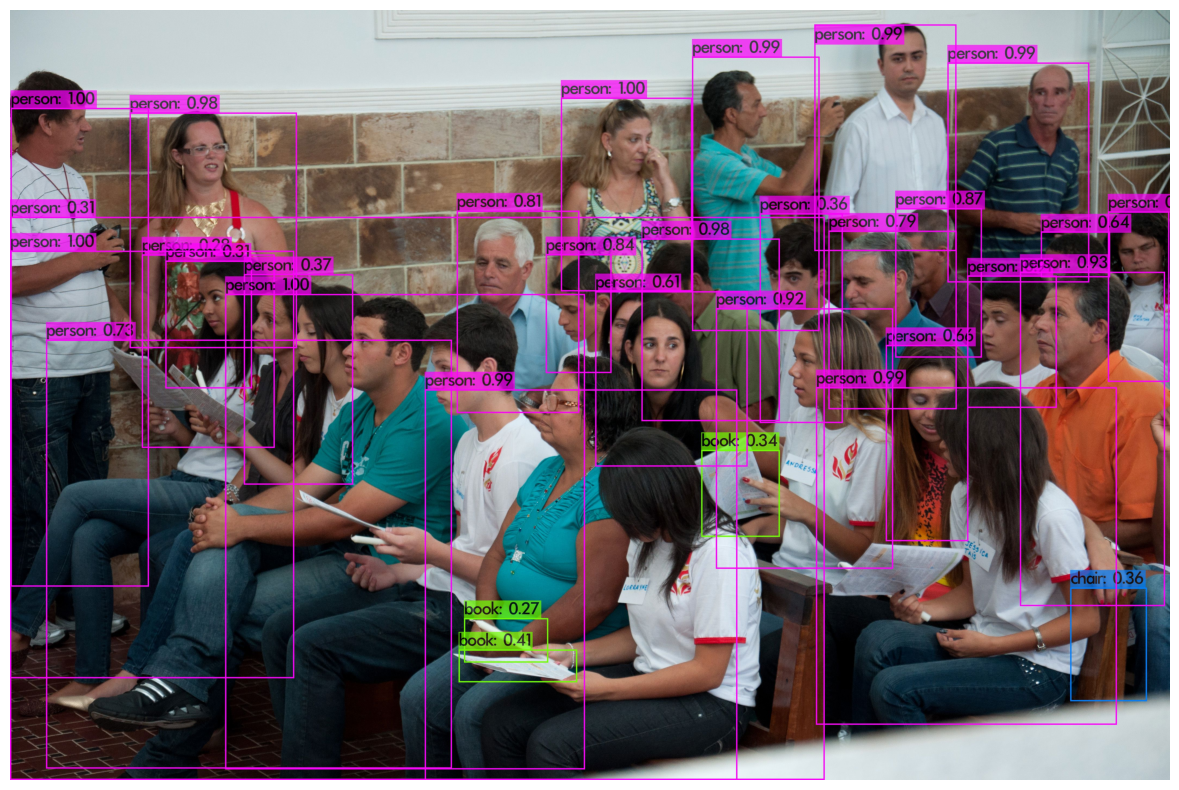

In [29]:


# Upload the image file
uploaded = files.upload()

# Get the filename from the uploaded file
image_filename = list(uploaded.keys())[0]

# Call the yolo_image function with the uploaded image
yolo_image(image_filename)

